In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

pd_data = pd.read_csv('내국인출국교통수단별_20230302171241.csv', encoding = 'cp949', header = 1)
pd_data.columns = ['시점','공항','항구']
print(pd_data.head(12))
print(pd_data.dtypes)


#공항, 항구 년중 월별 출국 인원 plot
#normalization  / standardization 적용, plot
#2015~22년까지
#2022년 연말 공항 이용객 증가하였음.
#2022년 연말에 출국인원이 늘어난 것이 항구 출국인원에도 반영되었는가.
#연말에 출국인원이 증가하는 것이 일반적인 추이인가.-> 코로나 이전/이후 연도별 추이
# .sort_values()
# .sort_index()

         시점      공항     항구
0   2015.01  103088  50545
1   2015.02   86907  44152
2   2015.03   86170  36822
3   2015.04   85345  46589
4   2015.05   88510  54680
5   2015.06   73846  36952
6   2015.07   90832  45586
7   2015.08   98274  58726
8   2015.09   84994  40296
9   2015.10   94559  51427
10  2015.11   90884  48958
11  2015.12   95942  46732
시점    float64
공항      int64
항구      int64
dtype: object


         시점     공항    항구
84  2022.01   1191  3279
85  2022.02   1349  3179
86  2022.03    905  3418
87  2022.04   1018  3158
88  2022.05    924  3231
89  2022.06   1171  3105
90  2022.07   4183  3326
91  2022.08   9141  3533
92  2022.09   8724  2682
93  2022.10  15826  3494
94  2022.11  35388  3687
95  2022.12  39415  5760
                시점            공항           항구
count    12.000000     12.000000    12.000000
mean   2022.065000   9936.250000  3487.666667
std       0.036056  13671.631113   759.498918
min    2022.010000    905.000000  2682.000000
25%    2022.037500   1132.750000  3173.750000
50%    2022.065000   2766.000000  3302.500000
75%    2022.092500  10812.250000  3503.750000
max    2022.120000  39415.000000  5760.000000


C:\Users\ITPS\AppData\Local\Temp\ipykernel_6916\703559356.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data2022['공항_norm'] = sub_data2022['공항'].apply(lambda x: (x-value_min)/(value_max-value_min))
C:\Users\ITPS\AppData\Local\Temp\ipykernel_6916\703559356.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data2022['공항_std'] = sub_data2022['공항'].apply(lambda x: (x-value_min)/(value_max-value_min))
C:\Users\ITPS\AppData\Local\Temp\ipykernel_6916\703559356.py:24: SettingWithCopyWarning: 
A val

TypeError: 'AxesSubplot' object is not subscriptable

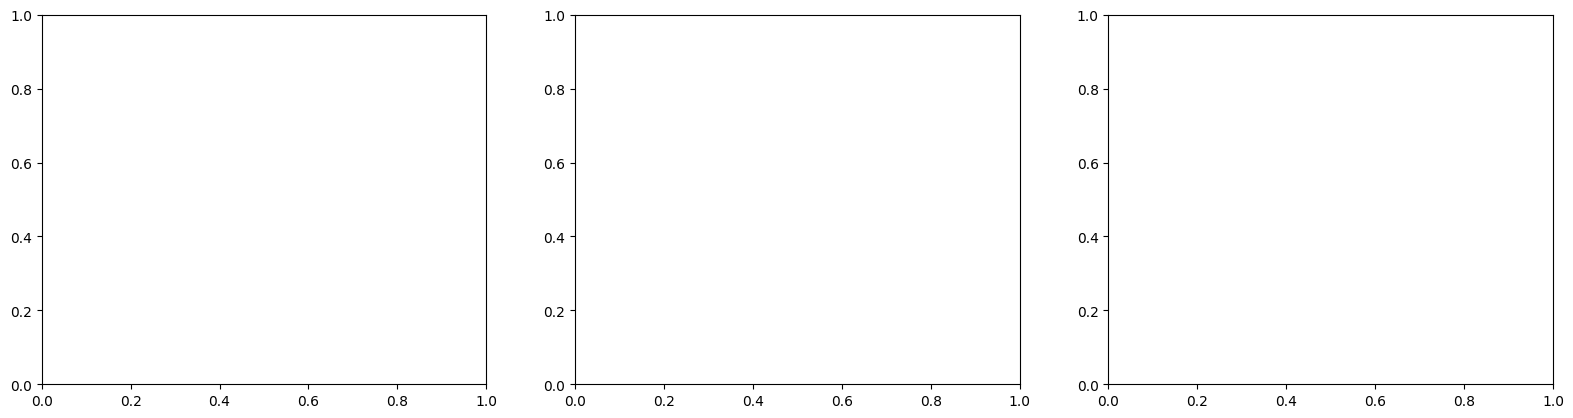

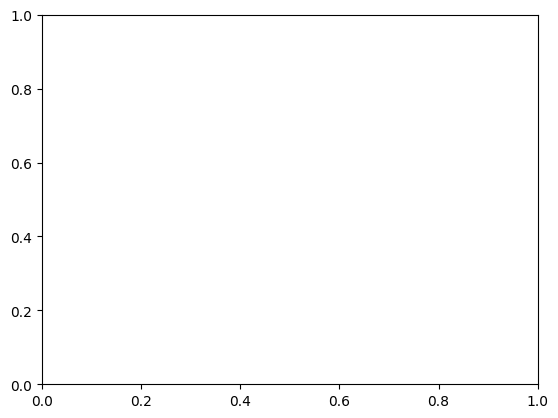

In [8]:
sub_data2022 = pd_data.tail(12)
print(sub_data2022)
print(sub_data2022.describe())
#     for n in ['공항','항구']:
#         value_min = sub_data2022[n].min()
#         value_max = sub_data2022[n].max()
#         value_std = sub_data2022[n].std()
#         value_mean = sub_data2022[n].mean()
#         sub_data2022[n +'_norm'] = sub_data2022['공항'].apply(lambda x: (x-value_min)/(value_max-value_min))
#         sub_data2022[n +'_std'] = sub_data2022['공항'].apply(lambda x: (x-value_min)/(value_max-value_min))    

value_min = sub_data2022['공항'].min()
value_max = sub_data2022['공항'].max()
value_std = sub_data2022['공항'].std()
value_mean = sub_data2022['공항'].mean()
sub_data2022['공항_norm'] = sub_data2022['공항'].apply(lambda x: (x-value_min)/(value_max-value_min))
sub_data2022['공항_std'] = sub_data2022['공항'].apply(lambda x: (x-value_min)/(value_max-value_min))


value_min = sub_data2022['항구'].min()
value_max = sub_data2022['항구'].max()
value_std = sub_data2022['항구'].std()
value_mean = sub_data2022['항구'].mean()
sub_data2022['항구_norm'] = sub_data2022['항구'].apply(lambda x: (x-value_min)/(value_max-value_min))
sub_data2022['항구_std'] = sub_data2022['항구'].apply(lambda x: (x-value_min)/(value_max-value_min))

fig, axe = plt.subplots(1,3)
fig.set_figwidth(6.5*3)


_,axe = plt.subplots()
axe[0].plot(np.arange(1, 13), sub_data2022['공항'])
axe[0].plot(np.arange(1, 13), sub_data2022['항구'])
# axe[0].set_title('{}_raw'.format(2015+i))

axe[1].plot(np.arange(1, 13), sub_data2022['공항_norm'])
axe[1].plot(np.arange(1, 13), sub_data2022['항구_norm'])
# axe[1].set_title('{}_raw'.format(2015+i))

axe[2].plot(np.arange(1, 13), sub_data2022['공항_std'])
axe[2].plot(np.arange(1, 13), sub_data2022['항구_std'])
# axe[2].set_title('{}_raw'.format(2015+i))

In [ ]:
pd_data.dtypes
yr = 
mo =

str_time = pd_data['시점'].astype('str')
yr = str_time.apply(lambda x: x.split('.')[0])
yr = str_time.apply(lambda x: x.split('.')[1])